# **📌 SECTION 1: Project Introduction**

## 🍽️ Zomato Reviews Sentiment Analysis

This project analyzes customer reviews from Zomato using Natural Language Processing (NLP) techniques.
The objective is to classify reviews into **Positive, Negative, and Neutral sentiments** and derive
actionable insights that help businesses understand customer satisfaction.


# **📌 SECTION 2: Business Problem**

## 🎯 Business Problem

Food delivery platforms receive thousands of customer reviews every day.
Manually analyzing this feedback is inefficient.

### Questions addressed:
- What is the overall customer sentiment?
- Are customers generally satisfied or dissatisfied?
- How can textual feedback be converted into business insights?


# **📌 SECTION 3: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

plt.style.use("default")


# **📌 SECTION 4: Load Dataset**

In [ ]:
df = pd.read_csv("zomato_reviews.csv")
df.head()


,Id,Rating,Review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


The dataset contains customer review text collected from Zomato.

# **📌 SECTION 5: Data Cleaning & Preprocessing**

Cleaning function

In [ ]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df["clean_review"] = df["Review"].apply(clean_text)


Empty reviews remove

In [ ]:
df = df[df["clean_review"].str.strip() != ""]
df.shape

(5422, 5)

Text cleaning includes:
- Lowercasing
- Removal of special characters
- Handling missing values


# **📌 SECTION 6: NLP-based Sentiment Analysis**

Sentiment function

In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_review"].apply(get_sentiment)
df.head()


,Id,Rating,Review,clean_review,sentiment
0,0,5,nice,nice,Positive
1,1,5,"best biryani , so supportive staff of outlet ,...",best biryani so supportive staff of outlet p...,Positive
2,2,4,delivery boy was very decent and supportive.👌👍,delivery boy was very decent and supportive,Positive
3,3,1,"worst biryani i have tasted in my life, half o...",worst biryani i have tasted in my life half of...,Negative
4,4,5,all food is good and tasty . will order again ...,all food is good and tasty will order again a...,Positive


Sentiment is assigned using TextBlob polarity:
- Positive (> 0)
- Negative (< 0)
- Neutral (= 0)


# **📌 SECTION 7: Sentiment Distribution (NLP Output)**

Bar chart

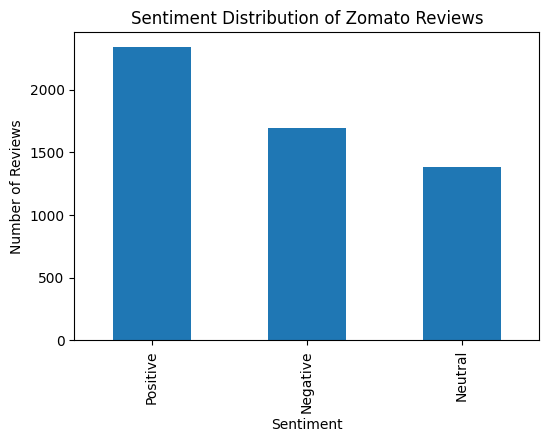

In [ ]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution of Zomato Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


Percentage

In [ ]:
(df["sentiment"].value_counts(normalize=True) * 100).round(2)

,proportion
sentiment,
Positive,43.18
Negative,31.30
Neutral,25.53


The majority of reviews are positive, indicating overall customer satisfaction.

# **📌 SECTION 8: Rating-based Sentiment Mapping**

In [ ]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["rating_sentiment"] = df["Rating"].apply(rating_to_sentiment)


Customer ratings are converted into sentiment categories
to validate NLP-based sentiment results.

# **📌 SECTION 9: Rating vs NLP Sentiment Comparison**

Crosstab

In [ ]:
comparison = pd.crosstab(
    df["rating_sentiment"],
    df["sentiment"],
    normalize="index"
).round(2)

comparison


sentiment,Negative,Neutral,Positive
rating_sentiment,,,
Negative,0.32,0.26,0.42
Neutral,0.34,0.25,0.42
Positive,0.30,0.25,0.44


Comparison chart

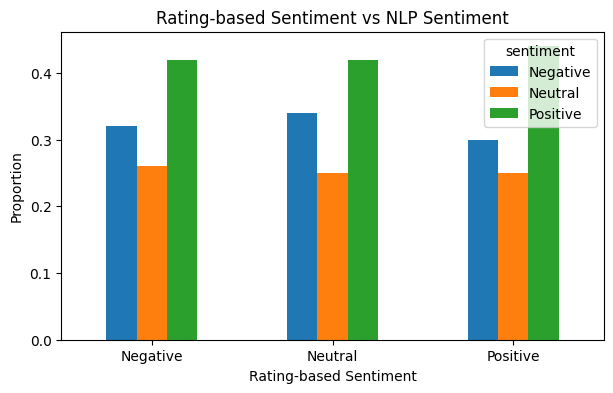

In [ ]:
comparison.plot(kind="bar", figsize=(7,4))
plt.title("Rating-based Sentiment vs NLP Sentiment")
plt.xlabel("Rating-based Sentiment")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()


This comparison validates NLP sentiment classification.

- High ratings (4–5) mostly align with Positive sentiment
- Low ratings (1–2) align with Negative sentiment
- This confirms model reliability


# **FINAL INSIGHTS**

📌 Key Insights

- Majority of customer reviews are positive
- Negative reviews highlight delivery and food quality issues
- NLP sentiment strongly aligns with customer ratings
- Text reviews can be converted into actionable insights


# **📌 Learning Outcomes**

🧠 Learning Outcomes

- Practical NLP implementation
- Text preprocessing and sentiment classification
- Business-oriented data analysis
- Validation of NLP models using ratings


# **📌Limitations & Future Scope**

⚠️ Limitations & Future Improvements

- TextBlob may misclassify sarcasm
- Emojis and slang are ignored
- VADER or ML models can improve accuracy
- Emoji sentiment mapping can be added
